# Handling NaN values in line geometries
`geom_path()`, `geom_line()`, and `geom_step()` now break lines at NaN values instead of connecting across missing data points.

In [1]:
from lets_plot import *
from lets_plot.bistro import *
from scipy.stats import multivariate_normal
from lets_plot.geo_data import *
import pandas as pd
import numpy as np

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).



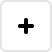
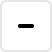
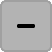
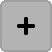
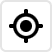
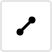
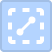
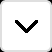
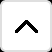
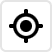
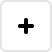
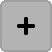
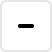
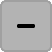
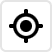
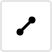
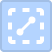
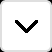
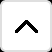
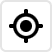

In [2]:
LetsPlot.setup_html()

As an example, let’s use a dataset with missing values.

In [3]:
path_df = pd.DataFrame({
    'x': [None, None, 0.0, None, 1.0, 2.0, None, 4.0, 5.0, 6.0, 7.0],
    'y': [None, 0.0, 0.5, 0.0, 0.0, 1.0, None, None, 0.5, 1.0, 0.8],
    'c': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
})
path_df

,x,y,c
0,NaN,NaN,1
1,NaN,0.0,2
2,0.0,0.5,3
3,NaN,0.0,4
4,1.0,0.0,5
5,2.0,1.0,6
6,NaN,NaN,7
7,4.0,NaN,8
8,5.0,0.5,9
9,6.0,1.0,10


Passing the data to geom_path as-is draws the path with breaks wherever values are missing. 

Note that if a single valid point is surrounded by invalid values, it will be dropped as well.

In [4]:
ggplot(path_df, aes('x','y')) + geom_path() + geom_point(color='red')

To keep the old behavior (all points connected as a single line), filter invalid entries first.

In [5]:
filtered_df = path_df.dropna()

In [6]:
ggplot(filtered_df, aes('x','y')) + geom_path() + geom_point(color='red')

#### `geom_path()` with `coord_polar()`

In [7]:
gggrid([
    ggplot(filtered_df, aes('x','y')) + geom_path() + coord_polar() + ggtitle('Old'),
    ggplot(path_df, aes('x','y')) + geom_path() + coord_polar() + ggtitle('Now'),
])

#### variadic `geom_path()`

In [8]:
gggrid([
    ggplot(filtered_df, aes('x','y', color='c')) + geom_path(size=3) + ggtitle('Old'),
    ggplot(path_df, aes('x','y', color='c')) + geom_path(size=3) + ggtitle('Now'),
])

#### It works the same for other “line” layers.

#### `geom_line()`

In [9]:
gggrid([
    ggplot(filtered_df, aes('x','y')) + geom_line() + ggtitle('Old'),
    ggplot(path_df, aes('x','y')) + geom_line() + ggtitle('Now'),
])

#### `geom_step()`

In [10]:
gggrid([
    ggplot(filtered_df, aes('x','y')) + geom_step() + ggtitle('Old'),
    ggplot(path_df, aes('x','y')) + geom_step() + ggtitle('Now'),
])

#### Layers with x-ordering
For layers with internal `x-ordering` (like `geom_line()` and `geom_step()`), `NaN` behavior differs for `x` and `y`. NaN in `x` don’t produce breaks because rows with missing `x` are filtered out before sorting.

In [11]:
df = pd.DataFrame({
    'x': [0.0, 4.0, 1.0, 5.0, 2.0, 6.0, 3.0, 7.0],
    'y': [4.0, 4.0, 3.0, 3.0, 2.0, 2.0, 1.0, 1.0],
    'x_na': [None, 4.0, 1.0, 5.0, 2.0, None, 3.0, 7.0],
    'y_na': [None, 4.0, 3.0, 3.0, 2.0, None, 1.0, 1.0],
    'c': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b']
})

In [12]:
line = ggplot(df, aes(x='x', y='y', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line')
line_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line NaN in x')
line_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_line(linewidth = 1) + ggtitle('geom_line NaN in y')
path = ggplot(df, aes(x='x', y='y', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path')
path_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path NaN in x')
path_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_path(linewidth = 1) + ggtitle('geom_path NaN in y')
step = ggplot(df, aes(x='x', y='y', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step')
step_x_na = ggplot(df, aes(x='x_na', y='y', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step NaN in x')
step_y_na = ggplot(df, aes(x='x', y='y_na', color='c')) + geom_step(linewidth = 1) + ggtitle('geom_step NaN in y')

In [13]:
gggrid([
    path, line, step,
    path_x_na, line_x_na, step_x_na,
    path_y_na, line_y_na, step_y_na
], ncol=3)